In [1]:
import pandas as pd

In [8]:
# 读取大csv文件
def read_big_csv(path):
    df_chunk =  pd.read_csv(path, chunksize=1000)
    res_chunk = []
    for chunk in df_chunk:
        res_chunk.append(chunk)
    res_df = pd.concat(res_chunk)
    return res_df

In [2]:
file_path = 'D:/Coding/Dataset/AlibabaClusterTrace/MicroserviceTrace/Node/Node_0.csv'
node_data = pd.read_csv(file_path)      # 经过测试还是这样快 因为内存大不需要多次读取

In [4]:
node_data.head(10)

,Unnamed: 0,timestamp,nodeid,node_cpu_usage,node_memory_usage
0,0,35820000,b1f98eed32dcd1bcb575af5f483ab12c3b7981b7d25c65...,0.597652,0.764590
1,1,0,50f7c53d8692424fbe603c78b4e61c19276a7823df7a85...,0.693309,0.753463
2,2,0,02d27a3d3bfa1b60f607ef05c14d2e37ef2fdb271e32e7...,0.720848,0.803620
3,3,0,b5952eee6a521b0f2b7ae15b122cc5a3714aba85cd5614...,0.679287,0.782882
4,4,0,2acfac3d84cd4aa3bb5d243069d18b8b2bcc8dfb84527c...,0.768881,0.776962
5,5,0,5cbd9ac26a81e868dfadf945054eb6bd8703131c99c536...,0.773522,0.765957
6,6,0,f66333e4613351b2dd89e7ffdb604cb4016f34c4084ec3...,0.428794,0.794682
7,7,0,1946291c5b695555122161e1bd00a4e955b32520ff3bf7...,0.383802,0.788398
8,8,0,2d36938c8e73138710f776269a1146eab7c2f6be4f6f4a...,0.719347,0.810243
9,9,0,bb23c55fca977cfd860f6a929d22f4cfd74f395bc295e1...,0.792145,0.750080


In [54]:
source_data = node_data.groupby('timestamp').sum()

In [55]:
source_data = source_data.drop(columns=['Unnamed: 0'])

In [47]:
source_data.head()

,node_cpu_usage,node_memory_usage
timestamp,,
0,9027.989180,9799.291909
30000,8992.537052,9799.102559
60000,8990.630661,9798.500761
90000,8977.928726,9798.810724
120000,8967.713103,9797.922752


In [56]:
source_data = source_data.reset_index()

In [57]:
source_data.head()

,timestamp,node_cpu_usage,node_memory_usage
0,0,9027.989180,9799.291909
1,30000,8992.537052,9799.102559
2,60000,8990.630661,9798.500761
3,90000,8977.928726,9798.810724
4,120000,8967.713103,9797.922752


In [58]:
source_data['time_idx'] = source_data['timestamp'].map(lambda x: int(x/30000))

In [59]:
source_data.head()

,timestamp,node_cpu_usage,node_memory_usage,time_idx
0,0,9027.989180,9799.291909,0
1,30000,8992.537052,9799.102559,1
2,60000,8990.630661,9798.500761,2
3,90000,8977.928726,9798.810724,3
4,120000,8967.713103,9797.922752,4


In [61]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6


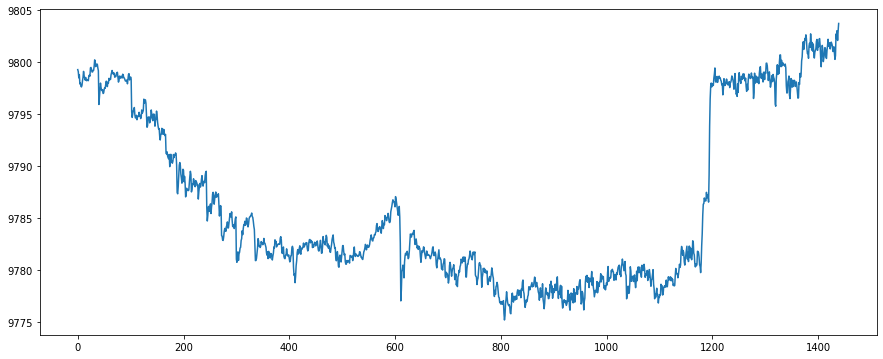

In [64]:

plt.plot(source_data['time_idx'], source_data['node_memory_usage'])